<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [38]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [39]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [40]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [41]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [42]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [43]:
# target 확인
target = 'charges'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:, target]


**2) 가변수화**

In [44]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region','children']

# 가변수화
X = pd.get_dummies(X, columns = dumm_cols, drop_first =True, dtype = int)

# 확인
list(X)

['age',
 'bmi',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'children_1',
 'children_2',
 'children_3',
 'children_4',
 'children_5']

**3) 학습용, 평가용 데이터 분리**

In [45]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**4) 정규화**

In [46]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [47]:
# xgboost 설치
# !pip install xgboost

In [48]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [49]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [50]:
# 모델 검증 함수
def val_func(model):
    cv_score = cross_val_score(model, X_train, y_train)
    print(cv_score)
    print(cv_score.mean())
    return cv_score.mean()

In [51]:
# 선언하기
model = LinearRegression()

In [52]:
# 결과수집
result = {}
result['Linear Regression'] = val_func(model)


[0.79416284 0.78995952 0.75233009 0.71051294 0.68080576]
0.7455542297534183


**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [53]:
# 선언하기
model = KNeighborsRegressor()
result['KNN'] = val_func(model)

[0.65544255 0.74070379 0.66647228 0.65561299 0.64870932]
0.6733881852030235


In [54]:
# 성능예측


In [55]:
# 결과확인


In [56]:
# 결과수집


**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [57]:
# 선언하기
model = DecisionTreeRegressor(max_depth=5)
result['Decision Tree'] = val_func(model)

[0.88437729 0.87731725 0.81342689 0.84931965 0.75253141]
0.8353944977650934


In [58]:
# 성능예측


In [59]:
# 결과확인


In [60]:
# 결과수집


**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [61]:
# help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sphx_glr_auto_examp

In [62]:
# 선언하기
model = RandomForestRegressor(max_depth=5)
result['RandomForest'] = val_func(model)

[0.88990642 0.88089637 0.85011051 0.86006421 0.79962196]
0.8561198949309011


In [63]:
# 성능예측


In [64]:
# 결과확인


In [65]:
# 결과수집


**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [66]:
# 선언하기
model = XGBRegressor(max_depth=5)
result['XGB'] = val_func(model)

[0.84119513 0.84207594 0.81464643 0.81416095 0.76140124]
0.8146959360059525


In [67]:
# 성능예측


In [68]:
# 결과확인


In [69]:
# 결과수집


**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [70]:
# 선언하기
model = LGBMRegressor(max_depth=5, verbose=-1)
result['LGBM'] = val_func(model)

[0.88109837 0.86968957 0.84429737 0.86313155 0.8031623 ]
0.852275833331932


In [71]:
# 성능예측


In [72]:
# 결과확인


In [73]:
# 결과수집


# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [74]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression 0.746
KNN 0.673
Decision Tree 0.835
RandomForest 0.856
XGB 0.815
LGBM 0.852


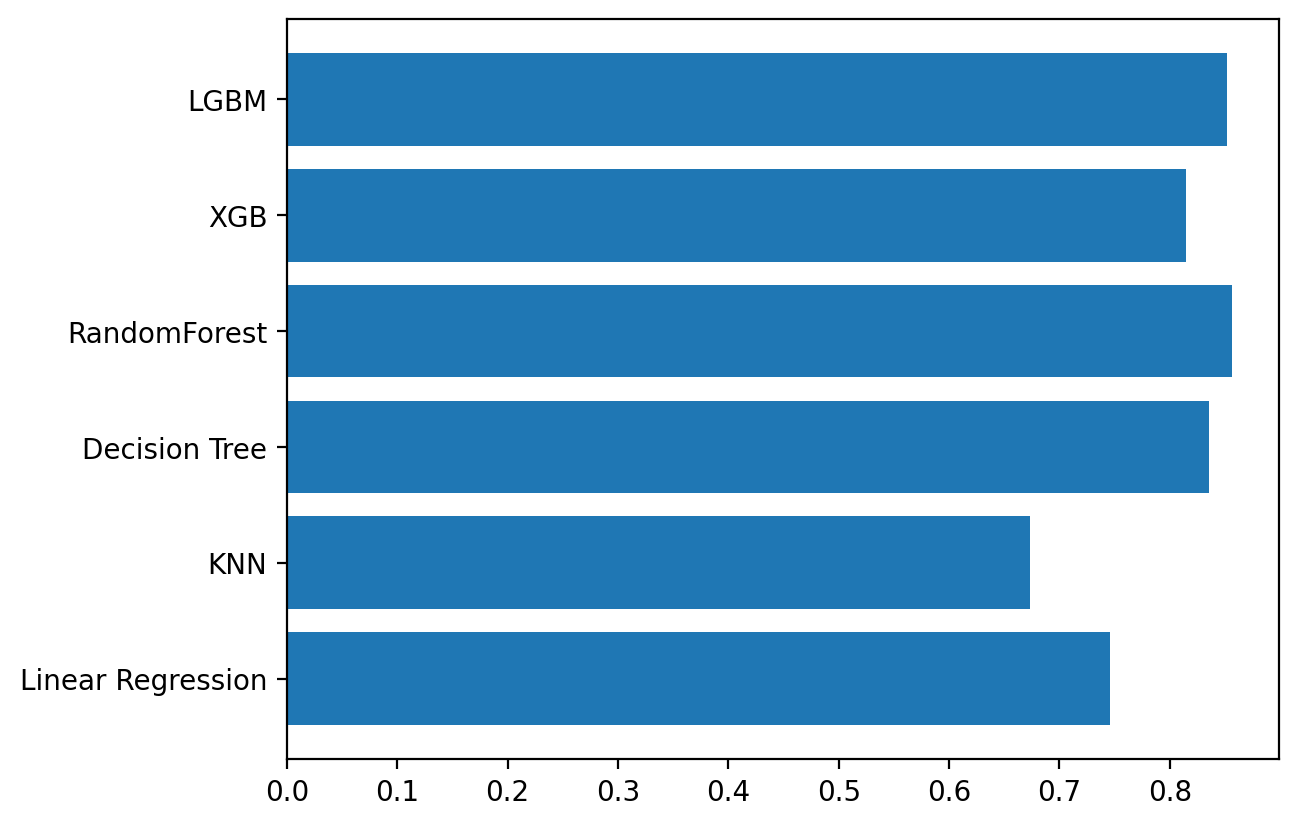

In [75]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [76]:
# 기본 모델 선언
model_rd = RandomForestRegressor()

# 파라미터 지정
  # max_depth: range(1, 21)
param = {
    'max_depth':range(1,21)
}

# 모델 선언
model = GridSearchCV(model_rd,
                    param,
                    cv=10,
                    scoring='r2')




In [77]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 21)}, scoring='r2')

In [78]:
# 최적 파라미터, 예측 최고 성능
print('best parameter : ', model.best_params_)
print('best score : ', model.best_score_)


best parameter :  {'max_depth': 4}
best score :  0.8523645821453736


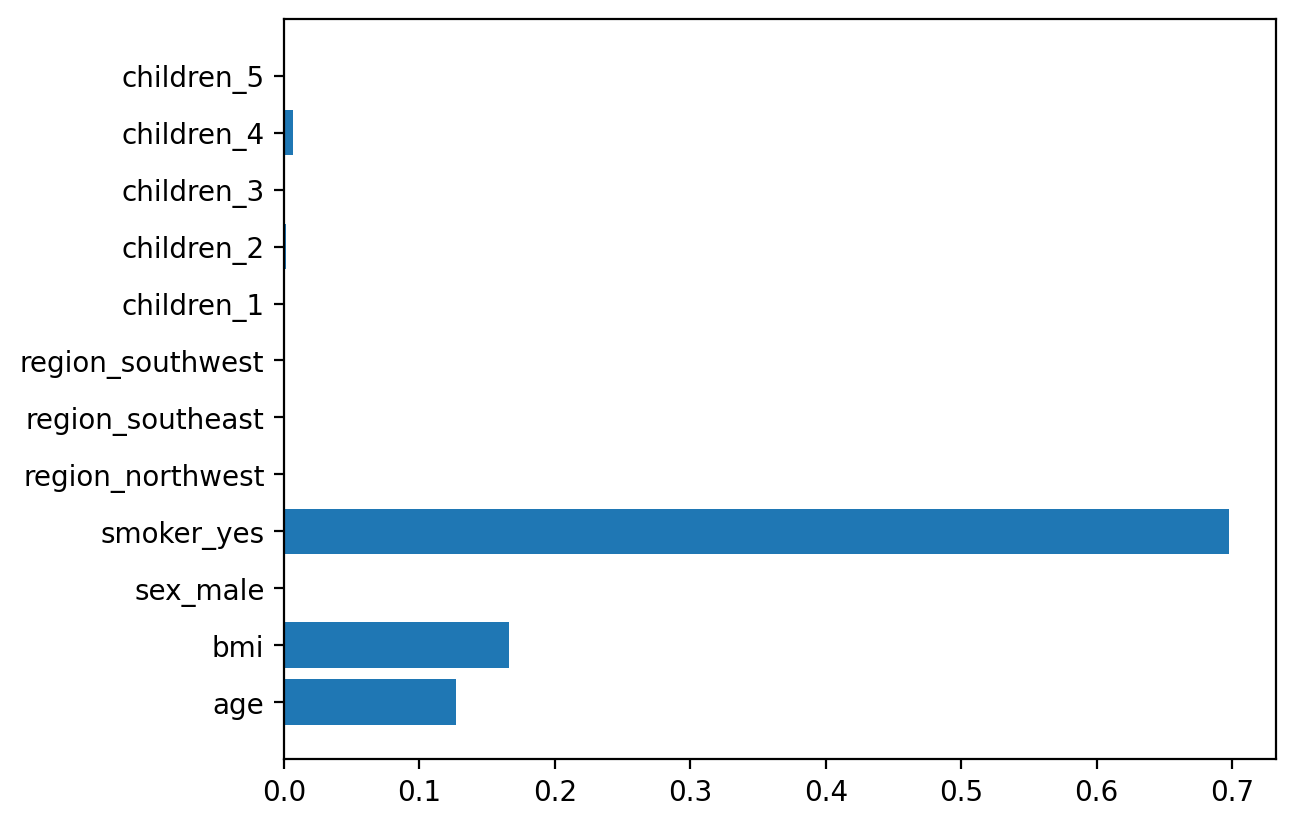

In [79]:
# 변수 중요도 시각화
plt.barh(list(X), model.best_estimator_.feature_importances_)
plt.show()

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [80]:
# 예측하기
y_pred = model.predict(X_test)

In [81]:
# 성능평가
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('r2 : ', r2_score(y_test, y_pred))


MAE :  2687.451364444639
r2 :  0.850773541449401
